In [5]:
import mysql.connector
import pandas as pd

# auth plugin added for 20.04
i40db = mysql.connector.connect(
  host="localhost",
  user="I40",
  passwd="Password1",
  database="Industry40db",
  auth_plugin='mysql_native_password'
)


df = pd.read_sql('SELECT * FROM roomData', con=i40db)

df.head()

,id,roomName,humidity,temperature,outsideTemp,CO2,readDate
0,1,E223,45.18,28.71,None,None,2020-04-23 14:08:15
1,2,E223,45.14,28.73,None,None,2020-04-23 14:08:17
2,3,E223,45.13,28.75,None,None,2020-04-23 14:08:19
3,4,E223,44.00,29.56,None,None,2020-04-23 14:09:13
4,5,E223,43.92,29.51,None,None,2020-04-23 14:09:15


In [6]:
i40db.close()

In [7]:
df.tail()

,id,roomName,humidity,temperature,outsideTemp,CO2,readDate
4,5,E223,43.92,29.51,None,None,2020-04-23 14:09:15
5,6,E223,43.83,29.49,None,None,2020-04-23 14:09:17
6,7,E223,47.63,27.64,None,None,2020-04-23 14:14:06
7,8,E223,47.58,27.60,None,None,2020-04-23 15:14:06
8,9,E223,47.52,27.63,None,None,2020-04-23 16:14:06


In [8]:
print(df['readDate'])


0   2020-04-23 14:08:15
1   2020-04-23 14:08:17
2   2020-04-23 14:08:19
3   2020-04-23 14:09:13
4   2020-04-23 14:09:15
5   2020-04-23 14:09:17
6   2020-04-23 14:14:06
7   2020-04-23 15:14:06
8   2020-04-23 16:14:06
Name: readDate, dtype: datetime64[ns]


In [9]:
df.head()

,id,roomName,humidity,temperature,outsideTemp,CO2,readDate
0,1,E223,45.18,28.71,None,None,2020-04-23 14:08:15
1,2,E223,45.14,28.73,None,None,2020-04-23 14:08:17
2,3,E223,45.13,28.75,None,None,2020-04-23 14:08:19
3,4,E223,44.00,29.56,None,None,2020-04-23 14:09:13
4,5,E223,43.92,29.51,None,None,2020-04-23 14:09:15


In [10]:
#drop empty columns (axis = 1) in place ie in the Dataframe
df.drop('outsideTemp', axis=1, inplace=True)
df.drop('CO2', axis=1, inplace=True)
df.head()

,id,roomName,humidity,temperature,readDate
0,1,E223,45.18,28.71,2020-04-23 14:08:15
1,2,E223,45.14,28.73,2020-04-23 14:08:17
2,3,E223,45.13,28.75,2020-04-23 14:08:19
3,4,E223,44.00,29.56,2020-04-23 14:09:13
4,5,E223,43.92,29.51,2020-04-23 14:09:15


In [11]:
#add columns for Date and Time 
df['Date'] = df['readDate'].apply(lambda dt: dt.date())
df['Time'] = df['readDate'].apply(lambda dt: dt.time())
df.head()

,id,roomName,humidity,temperature,readDate,Date,Time
0,1,E223,45.18,28.71,2020-04-23 14:08:15,2020-04-23,14:08:15
1,2,E223,45.14,28.73,2020-04-23 14:08:17,2020-04-23,14:08:17
2,3,E223,45.13,28.75,2020-04-23 14:08:19,2020-04-23,14:08:19
3,4,E223,44.00,29.56,2020-04-23 14:09:13,2020-04-23,14:09:13
4,5,E223,43.92,29.51,2020-04-23 14:09:15,2020-04-23,14:09:15


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

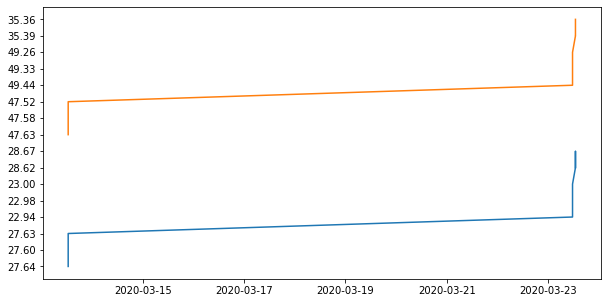

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
t = (df['readDate'])
ax.plot(t,df['temperature'], label='Temperature')
ax.plot(t,df['humidity'], label='Temperature')

In [10]:
df.dtypes

id                      int64
roomName               object
humidity               object
temperature            object
readDate       datetime64[ns]
Date                   object
Time                   object
dtype: object